# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
import json
import requests
import random

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from random import randint
from scipy.stats import linregress
from Config import api_key
output_data_file="output_data/cities.csv"


In [6]:
#Create citiy list from citypi using lat and long
cities = []
lats_long=[]
weather_info=[]
lat_range=(-90,90)
long_range=(-180,180)

lats = np.random.uniform(low=-90,high=90,size=1500)
lons = np.random.uniform(low=-180,high=180, size=1500)
lats_longs = zip(lats,lons)
   
for lats_long in lats_longs:
    city = citipy.nearest_city(lats_long[0],lats_long[1]).city_name
    
    if city not in cities:
            cities.append(city)            
print(cities)    
print(len(cities))
print(city)

['bathsheba', 'hobart', 'ranong', 'barentsburg', 'barrow', 'upernavik', 'taoudenni', 'kavieng', 'aklavik', 'itaqui', 'taltal', 'kapaa', 'leningradskiy', 'hermanus', 'pacific grove', 'dzhusaly', 'tiksi', 'sao jose', 'alugan', 'sao mateus do maranhao', 'rize', 'xinzhou', 'esperance', 'pyay', 'tiznit', 'tikrit', 'tura', 'vaitupu', 'chamalieres', 'vaini', 'attawapiskat', 'ushuaia', 'mar del plata', 'touros', 'wagar', 'marzuq', 'lavrentiya', 'le moule', 'privolzhskiy', 'tuatapere', 'yellowknife', 'jamestown', 'falmouth', 'laguna', 'alta floresta', 'cape town', 'caravelas', 'lompoc', 'sembakung', 'isangel', 'georgetown', 'corowa', 'rikitea', 'atambua', 'bubaque', 'saint-philippe', 'kindu', 'mataura', 'chuy', 'albany', 'bur gabo', 'turbat', 'humpolec', 'port alfred', 'roma', 'bonnyville', 'segou', 'porto seguro', 'bredasdorp', 'khatanga', 'belushya guba', 'east london', 'illoqqortoormiut', 'vila franca do campo', 'santa rosa', 'dongsheng', 'tasiilaq', 'tsihombe', 'atuona', 'deputatskiy', 'qaa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_info=[]
name=[]
city_infolat=[]
city_infolong=[]
temp=[]
max_temp=[]
Humidity=[]
Cloudiness=[]
wind_speed=[]
Country=[]
Date=[]
url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
print("Beginning Data Retrieval")

count=1
for city in cities:
    query_url=f"{url}appid={api_key}&units={units}&q="
    print(f"Process Record {count}---{city}")
    count=count +1
    response=requests.get(query_url +city).json()
    print(response)
    city_info.append(response)


Beginning Data Retrieval
Process Record 1---bathsheba
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 84.07, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1603334709, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1603273762, 'sunset': 1603316133}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
Process Record 2---hobart
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.53, 'feels_like': 51.3, 'temp_min': 57, 'temp_max': 60.01, 'pressure': 1016, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1603334552, 'sys': {'type': 1, 'id':

{'coord': {'lon': -49.17, 'lat': -28.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.57, 'feels_like': 72.34, 'temp_min': 67.57, 'temp_max': 67.57, 'pressure': 1022, 'humidity': 93, 'sea_level': 1022, 'grnd_level': 1013}, 'visibility': 4116, 'wind': {'speed': 1.28, 'deg': 214}, 'clouds': {'all': 100}, 'dt': 1603334711, 'sys': {'country': 'BR', 'sunrise': 1603269208, 'sunset': 1603315721}, 'timezone': -10800, 'id': 3448742, 'name': 'São José', 'cod': 200}
Process Record 19---alugan
{'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.86, 'feels_like': 90.7, 'temp_min': 85.86, 'temp_max': 85.86, 'pressure': 1008, 'humidity': 70, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.71, 'deg': 149}, 'clouds': {'all': 68}, 'dt': 1603334712, 'sys': {'country'

{'coord': {'lon': 46.47, 'lat': 14.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.55, 'feels_like': 60.17, 'temp_min': 65.55, 'temp_max': 65.55, 'pressure': 1015, 'humidity': 28, 'sea_level': 1015, 'grnd_level': 889}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 317}, 'clouds': {'all': 6}, 'dt': 1603334715, 'sys': {'country': 'YE', 'sunrise': 1603334791, 'sunset': 1603377017}, 'timezone': 10800, 'id': 72181, 'name': 'Marzuq', 'cod': 200}
Process Record 37---lavrentiya
{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.1, 'feels_like': 30.4, 'temp_min': 36.1, 'temp_max': 36.1, 'pressure': 1034, 'humidity': 89, 'sea_level': 1034, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 196}, 'clouds': {'all': 0}, 'dt': 1603334715, 'sys': {'country': 'RU', 'sunrise': 16033

{'coord': {'lon': 100.34, 'lat': 5.41}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 79.23, 'feels_like': 81.81, 'temp_min': 78.01, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 74}, 'visibility': 8000, 'wind': {'speed': 9.17, 'deg': 210}, 'rain': {'1h': 3.65}, 'clouds': {'all': 40}, 'dt': 1603334717, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1603321428, 'sunset': 1603364525}, 'timezone': 28800, 'id': 1735106, 'name': 'George Town', 'cod': 200}
Process Record 52---corowa
{'coord': {'lon': 146.38, 'lat': -36.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.13, 'feels_like': 71.13, 'temp_min': 73, 'temp_max': 73.4, 'pressure': 1013, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1603334717, 'sys': {'type': 1, 'id': 9611, 'country': 'AU', 'sunrise'

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 57.56, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1020, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1603334719, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1603338520, 'sunset': 1603385973}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
Process Record 70---khatanga
{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 7.02, 'feels_like': -4.23, 'temp_min': 7.02, 'temp_max': 7.02, 'pressure': 1002, 'humidity': 92, 'sea_level': 1002, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 126}, 'clouds': {'all': 68}, 'dt': 1603334720, 'sys': {'country': 'RU', 'sunrise': 1603328958,

{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.87, 'feels_like': 68.72, 'temp_min': 64, 'temp_max': 78.01, 'pressure': 1010, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 15.28, 'deg': 10}, 'clouds': {'all': 31}, 'dt': 1603334498, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK', 'sunrise': 1603318947, 'sunset': 1603360373}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
Process Record 88---sitka
{'coord': {'lon': -135.33, 'lat': 57.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 25.03, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1030, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 60}, 'clouds': {'all': 1}, 'dt': 1603334617, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1603295335, 'sunset': 

{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 79.9, 'temp_min': 77, 'temp_max': 77, 'pressure': 1013, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1603334725, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1603296150, 'sunset': 1603341866}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
Process Record 109---ahumada
{'cod': '404', 'message': 'city not found'}
Process Record 110---nikolskoye
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 38.71, 'feels_like': 30.88, 'temp_min': 37.99, 'temp_max': 39.2, 'pressure': 1009, 'humidity': 93}, 'visibility': 3800, 'wind':

{'coord': {'lon': -60.17, 'lat': -35.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 49.42, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1028, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 90, 'gust': 15.01}, 'rain': {'1h': 0.65}, 'clouds': {'all': 100}, 'dt': 1603334727, 'sys': {'type': 3, 'id': 2019609, 'country': 'AR', 'sunrise': 1603271359, 'sunset': 1603318848}, 'timezone': -10800, 'id': 3833112, 'name': 'Veinticinco de Mayo', 'cod': 200}
Process Record 126---flin flon
{'coord': {'lon': -101.86, 'lat': 54.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.62, 'feels_like': 17.94, 'temp_min': 24.62, 'temp_max': 24.62, 'pressure': 1024, 'humidity': 90, 'sea_level': 1024, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 308}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': 14.81, 'lat': 56.88}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 53.35, 'feels_like': 46.58, 'temp_min': 53.01, 'temp_max': 53.6, 'pressure': 994, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1603334730, 'sys': {'type': 1, 'id': 1763, 'country': 'SE', 'sunrise': 1603345752, 'sunset': 1603381252}, 'timezone': 7200, 'id': 2663536, 'name': 'Vaxjo', 'cod': 200}
Process Record 144---hualmay
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 62.94, 'feels_like': 60.12, 'temp_min': 62.94, 'temp_max': 62.94, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.37, 'deg': 155}, 'clouds': {'all': 30}, 'dt': 1603334730, 'sys': {'country': 'PE', 'sunrise': 1603

{'coord': {'lon': -59.43, 'lat': -34.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.98, 'feels_like': 52.99, 'temp_min': 55, 'temp_max': 57.99, 'pressure': 1024, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 135, 'gust': 15.99}, 'clouds': {'all': 100}, 'dt': 1603334734, 'sys': {'type': 3, 'id': 2030118, 'country': 'AR', 'sunrise': 1603271239, 'sunset': 1603318614}, 'timezone': -10800, 'id': 3430708, 'name': 'Mercedes', 'cod': 200}
Process Record 162---lebu
{'coord': {'lon': -73.65, 'lat': -37.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.6, 'feels_like': 36.59, 'temp_min': 46.6, 'temp_max': 46.6, 'pressure': 1022, 'humidity': 85, 'sea_level': 1022, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 14.67, 'deg': 185}, 'clouds': {'all': 0}, 'dt': 1603334734, 'sys': {'country': 'CL', '

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 50.31, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 18}, 'clouds': {'all': 0}, 'dt': 1603334736, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1603337238, 'sunset': 1603384601}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
Process Record 177---bambous virieux
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 72.73, 'feels_like': 71.04, 'temp_min': 72, 'temp_max': 73.4, 'pressure': 1019, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1603334736, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1603330372, 'sunset

{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43.5, 'feels_like': 33.35, 'temp_min': 43.5, 'temp_max': 43.5, 'pressure': 1022, 'humidity': 68, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 12.12, 'deg': 315}, 'clouds': {'all': 89}, 'dt': 1603334738, 'sys': {'country': 'RU', 'sunrise': 1603310974, 'sunset': 1603348207}, 'timezone': 39600, 'id': 2121385, 'name': "Severo-Kuril'sk", 'cod': 200}
Process Record 195---akdepe
{'coord': {'lon': 59.38, 'lat': 42.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 43.72, 'feels_like': 37.89, 'temp_min': 42.8, 'temp_max': 44.6, 'pressure': 1027, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 280}, 'clouds': {'all': 33}, 'dt': 1603334739, 'sys': {'type': 1, 'id': 8993, 'country': 'TM', 'sun

{'coord': {'lon': -122.63, 'lat': 38.96}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.67, 'feels_like': 65.08, 'temp_min': 66.99, 'temp_max': 70, 'pressure': 1010, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 284}, 'clouds': {'all': 56}, 'dt': 1603334741, 'sys': {'type': 3, 'id': 2008507, 'country': 'US', 'sunrise': 1603290395, 'sunset': 1603329791}, 'timezone': -25200, 'id': 5337908, 'name': 'Clearlake', 'cod': 200}
Process Record 213---mackay
{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 81.99, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1012, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 20}, 'clouds': {'all': 21}, 'dt': 1603334741, 'sys': {'type': 1, 'id': 9498, 'country': 'AU', 'sunrise': 1603308392, 'sunse

{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.41, 'feels_like': 91.9, 'temp_min': 85.41, 'temp_max': 85.41, 'pressure': 1009, 'humidity': 61, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 264}, 'clouds': {'all': 4}, 'dt': 1603334743, 'sys': {'country': 'LK', 'sunrise': 1603325968, 'sunset': 1603368873}, 'timezone': 19800, 'id': 1242110, 'name': 'Kalmunai', 'cod': 200}
Process Record 231---dikson
{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.39, 'feels_like': 12.49, 'temp_min': 24.39, 'temp_max': 24.39, 'pressure': 1003, 'humidity': 94, 'sea_level': 1003, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 65}, 'clouds': {'all': 99}, 'dt': 1603334743, 'sys': {'country': 'RU', 'su

{'cod': '404', 'message': 'city not found'}
Process Record 246---adrar
{'coord': {'lon': -10.07, 'lat': 20.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.44, 'feels_like': 76.77, 'temp_min': 82.44, 'temp_max': 82.44, 'pressure': 1012, 'humidity': 19, 'sea_level': 1012, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 4.85, 'deg': 86}, 'clouds': {'all': 12}, 'dt': 1603334745, 'sys': {'country': 'MR', 'sunrise': 1603348676, 'sunset': 1603390269}, 'timezone': 0, 'id': 2381972, 'name': 'Adrar', 'cod': 200}
Process Record 247---kloulklubed
{'coord': {'lon': 134.26, 'lat': 7.04}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 87.49, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 270}, 'rain': {'1h': 0.97}, 'clouds': {'all': 90}, 

{'coord': {'lon': 29.42, 'lat': -30.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 54.32, 'feels_like': 52.05, 'temp_min': 54.32, 'temp_max': 54.32, 'pressure': 1023, 'humidity': 81, 'sea_level': 1023, 'grnd_level': 879}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 321}, 'rain': {'1h': 0.17}, 'clouds': {'all': 34}, 'dt': 1603334747, 'sys': {'country': 'ZA', 'sunrise': 1603336550, 'sunset': 1603383441}, 'timezone': 7200, 'id': 988356, 'name': 'Kokstad', 'cod': 200}
Process Record 264---fortuna
{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 45.7, 'temp_min': 50, 'temp_max': 54, 'pressure': 1017, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1603334638, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise

{'coord': {'lon': -71.14, 'lat': 21.46}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.66, 'feels_like': 82.63, 'temp_min': 81.66, 'temp_max': 81.66, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 15.37, 'deg': 86}, 'rain': {'1h': 0.24}, 'clouds': {'all': 100}, 'dt': 1603334728, 'sys': {'country': 'TC', 'sunrise': 1603276962, 'sunset': 1603318510}, 'timezone': -14400, 'id': 3576994, 'name': 'Cockburn Town', 'cod': 200}
Process Record 282---nago
{'coord': {'lon': 127.98, 'lat': 26.59}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 75.74, 'feels_like': 82.18, 'temp_min': 75, 'temp_max': 77, 'pressure': 1009, 'humidity': 94}, 'visibility': 8047, 'wind': {'speed': 5.82, 'deg': 150}, 'rain': {'1h': 1.97

{'coord': {'lon': -72.42, 'lat': -35.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.12, 'feels_like': 42.85, 'temp_min': 49.12, 'temp_max': 49.12, 'pressure': 1020, 'humidity': 81, 'sea_level': 1020, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.48, 'deg': 195}, 'clouds': {'all': 0}, 'dt': 1603334751, 'sys': {'country': 'CL', 'sunrise': 1603274304, 'sunset': 1603321783}, 'timezone': -10800, 'id': 3893726, 'name': 'Constitución', 'cod': 200}
Process Record 297---hofn
{'coord': {'lon': -15.21, 'lat': 64.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36, 'feels_like': 27.9, 'temp_min': 36, 'temp_max': 36, 'pressure': 1004, 'humidity': 81, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 20}, 'clouds': {'all': 68}, 'dt': 1603334751, 'sys': {'country': 'IS', 'sunris

{'coord': {'lon': -60.67, 'lat': 2.82}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 86.45, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 110}, 'rain': {'1h': 1.54}, 'clouds': {'all': 21}, 'dt': 1603334753, 'sys': {'type': 1, 'id': 8340, 'country': 'BR', 'sunrise': 1603273551, 'sunset': 1603316896}, 'timezone': -14400, 'id': 3664980, 'name': 'Boa Vista', 'cod': 200}
Process Record 315---matagami
{'coord': {'lon': -77.63, 'lat': 49.75}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 27.23, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1017, 'humidity': 100}, 'visibility': 2816, 'wind': {'speed': 5.82, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1603334754, 'sys': {'type': 1, 'id': 866, 'country': 'CA', 'sunrise': 1603280538, 'sun

{'coord': {'lon': 64.47, 'lat': 55.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.93, 'feels_like': 20.84, 'temp_min': 29.93, 'temp_max': 29.93, 'pressure': 1006, 'humidity': 95, 'sea_level': 1006, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 8.97, 'deg': 278}, 'clouds': {'all': 100}, 'dt': 1603334756, 'sys': {'country': 'RU', 'sunrise': 1603333592, 'sunset': 1603369577}, 'timezone': 18000, 'id': 1485721, 'name': 'Yurgamysh', 'cod': 200}
Process Record 333---thompson
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 18.19, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 1020, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1603334756, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1603

{'coord': {'lon': -15.98, 'lat': 18.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 76.89, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 69}, 'visibility': 7000, 'wind': {'speed': 14.99, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1603334758, 'sys': {'type': 1, 'id': 2482, 'country': 'MR', 'sunrise': 1603349969, 'sunset': 1603391813}, 'timezone': 0, 'id': 2377450, 'name': 'Nouakchott', 'cod': 200}
Process Record 348---pangnirtung
{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 24.42, 'feels_like': 16.9, 'temp_min': 24.42, 'temp_max': 24.42, 'pressure': 1010, 'humidity': 94, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 158, 'wind': {'speed': 5.01, 'deg': 89}, 'snow': {'1h': 0.26}, 'clouds': {'all': 100}, 'dt': 1603334758, 'sys': {'country': 'CA', 'su

{'coord': {'lon': 72.95, 'lat': 23.6}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 86.07, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1008, 'humidity': 69}, 'visibility': 3000, 'wind': {'speed': 3.36, 'deg': 320}, 'clouds': {'all': 12}, 'dt': 1603334759, 'sys': {'type': 1, 'id': 9049, 'country': 'IN', 'sunrise': 1603328912, 'sunset': 1603370188}, 'timezone': 19800, 'id': 1270099, 'name': 'Himatnagar', 'cod': 200}
Process Record 363---la ronge
{'coord': {'lon': -105.28, 'lat': 55.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 17.38, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 1023, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1603334760, 'sys': {'type': 1, 'id': 949, 'country': 'CA', 'sunrise': 1603287829, 'sunset': 16033240

{'coord': {'lon': -93.23, 'lat': 38.7}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 55.13, 'feels_like': 53.46, 'temp_min': 55, 'temp_max': 55.4, 'pressure': 1017, 'humidity': 93}, 'visibility': 402, 'wind': {'speed': 4.7, 'deg': 40}, 'clouds': {'all': 90}, 'dt': 1603334529, 'sys': {'type': 1, 'id': 3834, 'country': 'US', 'sunrise': 1603283314, 'sunset': 1603322761}, 'timezone': -18000, 'id': 4408000, 'name': 'Sedalia', 'cod': 200}
Process Record 380---hvide sande
{'coord': {'lon': 8.13, 'lat': 56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 52.59, 'temp_min': 55, 'temp_max': 55, 'pressure': 998, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 267, 'gust': 15.01}, 'clouds': {'all': 94}, 'dt': 1603334762, 'sys': {'type': 3, 'id': 2008076, 'country': 'DK', 'sunrise': 1603347224, 'sunset': 16033829

{'coord': {'lon': 13.41, 'lat': -12.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.34, 'feels_like': 78.57, 'temp_min': 74.34, 'temp_max': 74.34, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 274}, 'clouds': {'all': 100}, 'dt': 1603334764, 'sys': {'country': 'AO', 'sunrise': 1603341422, 'sunset': 1603386254}, 'timezone': 3600, 'id': 3351663, 'name': 'Benguela', 'cod': 200}
Process Record 398---bazaliya
{'coord': {'lon': 26.47, 'lat': 49.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.63, 'feels_like': 38.55, 'temp_min': 45.63, 'temp_max': 45.63, 'pressure': 1019, 'humidity': 59, 'sea_level': 1019, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 6.24, 'deg': 216}, 'clouds': {'all': 75}, 'dt': 1603334764, 'sys': {'country'

{'coord': {'lon': 113.29, 'lat': 50.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 36.66, 'feels_like': 27.61, 'temp_min': 36.66, 'temp_max': 36.66, 'pressure': 1022, 'humidity': 73, 'sea_level': 1022, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 292}, 'clouds': {'all': 1}, 'dt': 1603334765, 'sys': {'country': 'RU', 'sunrise': 1603321221, 'sunset': 1603358517}, 'timezone': 32400, 'id': 2028028, 'name': 'Aksha', 'cod': 200}
Process Record 413---parit buntar
{'coord': {'lon': 100.49, 'lat': 5.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.14, 'feels_like': 86, 'temp_min': 78.01, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 83}, 'visibility': 7000, 'wind': {'speed': 4.7, 'deg': 0}, 'rain': {'1h': 0.13}, 'clouds': {'all': 40}, 'dt': 1603334547, 'sys': {'type': 1, 'id': 9438, 'country': 'MY', 'sunri

Process Record 428---the valley
{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.79, 'feels_like': 90.91, 'temp_min': 81, 'temp_max': 82.4, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1603334767, 'sys': {'type': 1, 'id': 8801, 'country': 'AI', 'sunrise': 1603274857, 'sunset': 1603316738}, 'timezone': -14400, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
Process Record 429---horodnytsya
{'coord': {'lon': 27.32, 'lat': 50.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.85, 'feels_like': 37.89, 'temp_min': 44.85, 'temp_max': 44.85, 'pressure': 1017, 'humidity': 69, 'sea_level': 1017, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 217}, 'clouds': {'all': 95}, 'dt': 1603334767, 'sys

{'coord': {'lon': -1.15, 'lat': 60.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 32.68, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 999, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 40}, 'clouds': {'all': 99}, 'dt': 1603334769, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1603350149, 'sunset': 1603384515}, 'timezone': 3600, 'id': 2644605, 'name': 'Lerwick', 'cod': 200}
Process Record 444---sinnar
{'coord': {'lon': 33.57, 'lat': 13.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.5, 'feels_like': 80.31, 'temp_min': 81.5, 'temp_max': 81.5, 'pressure': 1009, 'humidity': 52, 'sea_level': 1009, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 9.4, 'deg': 228}, 'clouds': {'all': 0}, 'dt': 1603334769, 'sys': {'country': 'SD', 'sunrise': 1603337847, 'sun

{'coord': {'lon': 76.1, 'lat': 53.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 40.57, 'feels_like': 26.91, 'temp_min': 40.57, 'temp_max': 40.57, 'pressure': 1006, 'humidity': 68, 'sea_level': 1006, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 17.6, 'deg': 283}, 'clouds': {'all': 100}, 'dt': 1603334770, 'sys': {'country': 'KZ', 'sunrise': 1603330488, 'sunset': 1603367099}, 'timezone': 21600, 'id': 1523662, 'name': 'Kachīry', 'cod': 200}
Process Record 459---mbuji-mayi
{'coord': {'lon': 23.6, 'lat': -6.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.71, 'feels_like': 71.13, 'temp_min': 67.71, 'temp_max': 67.71, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 1.86, 'deg': 193}, 'rain': {'1h': 0.13}, 'clouds': {'all': 40}, 'dt': 1603334771, 's

{'coord': {'lon': 23.68, 'lat': 70.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 13.87, 'temp_min': 23, 'temp_max': 23, 'pressure': 1008, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1603334773, 'sys': {'type': 1, 'id': 1632, 'country': 'NO', 'sunrise': 1603347275, 'sunset': 1603375472}, 'timezone': 7200, 'id': 779683, 'name': 'Hammerfest', 'cod': 200}
Process Record 477---liuzhou
{'coord': {'lon': 109.39, 'lat': 24.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.76, 'feels_like': 63.88, 'temp_min': 71.76, 'temp_max': 71.76, 'pressure': 1017, 'humidity': 49, 'sea_level': 1017, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 14.92, 'deg': 7}, 'clouds': {'all': 19}, 'dt': 1603334773, 'sys': {'country': 'CN', 'sunrise': 1603320202, 'sunset

{'coord': {'lon': -76.77, 'lat': -10.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 49.51, 'feels_like': 43.54, 'temp_min': 49.51, 'temp_max': 49.51, 'pressure': 1019, 'humidity': 63, 'sea_level': 1019, 'grnd_level': 672}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 59}, 'rain': {'1h': 0.16}, 'clouds': {'all': 57}, 'dt': 1603334774, 'sys': {'country': 'PE', 'sunrise': 1603276780, 'sunset': 1603321395}, 'timezone': -18000, 'id': 3933867, 'name': 'Oyón', 'cod': 200}
Process Record 494---umzimvubu
{'cod': '404', 'message': 'city not found'}
Process Record 495---rocky mount
{'coord': {'lon': -77.79, 'lat': 35.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.93, 'feels_like': 65.79, 'temp_min': 63, 'temp_max': 64.4, 'pressure': 1024, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.28, 'deg': 131}, 'clouds': {'al

{'coord': {'lon': -38.88, 'lat': -15.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 79.9, 'temp_min': 77, 'temp_max': 77, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1603334776, 'sys': {'type': 1, 'id': 8422, 'country': 'BR', 'sunrise': 1603267431, 'sunset': 1603312558}, 'timezone': -10800, 'id': 3470137, 'name': 'Belmonte', 'cod': 200}
Process Record 511---naze
{'coord': {'lon': 129.48, 'lat': 28.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 86.59, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1603334777, 'sys': {'type': 1, 'id': 8013, 'country': 'JP', 'sunrise': 1603315609, 'sunset': 160335

{'coord': {'lon': -55.98, 'lat': -31.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.32, 'feels_like': 54.73, 'temp_min': 61.32, 'temp_max': 61.32, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 14.52, 'deg': 83}, 'clouds': {'all': 94}, 'dt': 1603334778, 'sys': {'country': 'UY', 'sunrise': 1603270615, 'sunset': 1603317582}, 'timezone': -10800, 'id': 3440034, 'name': 'Tacuarembó', 'cod': 200}
Process Record 526---awjilah
{'coord': {'lon': 21.29, 'lat': 29.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.4, 'feels_like': 54.81, 'temp_min': 60.4, 'temp_max': 60.4, 'pressure': 1021, 'humidity': 64, 'sea_level': 1021, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 345}, 'clouds': {'all': 0}, 'dt': 1603334778, 'sys': {'country': 'LY

{'coord': {'lon': -53.33, 'lat': -23.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.47, 'feels_like': 72.18, 'temp_min': 73.47, 'temp_max': 73.47, 'pressure': 1014, 'humidity': 69, 'sea_level': 1014, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 9.95, 'deg': 73}, 'clouds': {'all': 1}, 'dt': 1603334780, 'sys': {'country': 'BR', 'sunrise': 1603270471, 'sunset': 1603316454}, 'timezone': -10800, 'id': 3445782, 'name': 'Umuarama', 'cod': 200}
Process Record 544---flora
{'coord': {'lon': -88.49, 'lat': 38.67}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 56.71, 'feels_like': 56.79, 'temp_min': 55.4, 'temp_max': 57.2, 'pressure': 1020, 'humidity': 100}, 'visibility': 3219, 'wind': {'speed': 3.62, 'deg': 117}, 'clouds': {'all': 90}, 'dt': 1603334780, 'sys': {'type': 1, 'id': 4125, 'country': 'US', 'sunrise': 1603282174, 'sunset

{'coord': {'lon': 37.18, 'lat': 35.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.53, 'feels_like': 61.11, 'temp_min': 62.53, 'temp_max': 62.53, 'pressure': 1019, 'humidity': 87, 'sea_level': 1019, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 7.43, 'deg': 228}, 'clouds': {'all': 0}, 'dt': 1603334782, 'sys': {'country': 'SY', 'sunrise': 1603338212, 'sunset': 1603378055}, 'timezone': 10800, 'id': 172515, 'name': 'Abu Samrah', 'cod': 200}
Process Record 559---ostrovnoy
{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.2, 'feels_like': 21.15, 'temp_min': 28.2, 'temp_max': 28.2, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 1981, 'wind': {'speed': 5.14, 'deg': 249}, 'clouds': {'all': 91}, 'dt': 1603334782, 'sys': {'country': 'RU', 's

In [13]:
 
    for data in city_info:
        if data['cod']==200:
            name.append(data['name'])
            city_infolat.append(data['coord']['lat'])
            city_infolong.append(data['coord']['lon'])
            temp.append(data['main']['temp'])
            max_temp.append(data['main']['temp_max'])
            Humidity.append(data['main']['humidity'])
            Cloudiness.append(data['clouds']['all'])
            wind_speed.append(data['wind']['speed'])
            Country.append(data['sys']['country'])
            Date.append(data['dt'])
            
Date=time.strftime("%m/%d/%Y")            

AttributeError: 'str' object has no attribute 'append'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict= {
    "Name":name,
    "lat":city_infolat,
    "lng":city_infolong,
    "Max Temp":max_temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":wind_speed,
    "Country":Country,
    "Date":Date
}
weather_data_df=pd.DataFrame(weather_dict)
weather_data_df

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.22,-59.52,82.40,83,75,17.22,BB,10/21/2020
1,Hobart,-42.88,147.33,60.01,58,75,10.29,AU,10/21/2020
2,Ranong,9.97,98.63,82.40,88,75,3.78,TH,10/21/2020
3,Barrow,71.29,-156.79,33.80,95,90,16.11,US,10/21/2020
4,Upernavik,72.79,-56.15,23.16,95,70,3.09,GL,10/21/2020
...,...,...,...,...,...,...,...,...,...
529,Naica,27.85,-105.48,74.34,33,8,10.11,MX,10/21/2020
530,Eureka,40.80,-124.16,55.40,62,1,9.17,US,10/21/2020
531,Tigre,-34.43,-58.58,59.00,87,90,19.46,AR,10/21/2020
532,Troitsko-Pechorsk,62.71,56.20,23.97,94,99,10.09,RU,10/21/2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
clean_dataframe=weather_data_df.copy()
clean_dataframe=clean_dataframe.loc[~(clean_dataframe["Humidity"]<0)]
clean_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.22,-59.52,82.40,83,75,17.22,BB,10/21/2020
1,Hobart,-42.88,147.33,60.01,58,75,10.29,AU,10/21/2020
2,Ranong,9.97,98.63,82.40,88,75,3.78,TH,10/21/2020
3,Barrow,71.29,-156.79,33.80,95,90,16.11,US,10/21/2020
4,Upernavik,72.79,-56.15,23.16,95,70,3.09,GL,10/21/2020
...,...,...,...,...,...,...,...,...,...
529,Naica,27.85,-105.48,74.34,33,8,10.11,MX,10/21/2020
530,Eureka,40.80,-124.16,55.40,62,1,9.17,US,10/21/2020
531,Tigre,-34.43,-58.58,59.00,87,90,19.46,AR,10/21/2020
532,Troitsko-Pechorsk,62.71,56.20,23.97,94,99,10.09,RU,10/21/2020


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

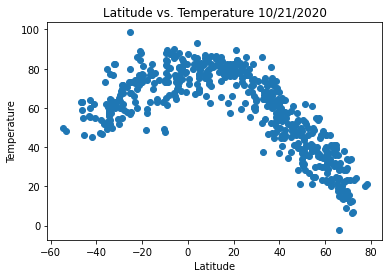

<Figure size 432x288 with 0 Axes>

In [16]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Max Temp']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Temperature {Date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("datafig101.png")

## Latitude vs. Humidity Plot

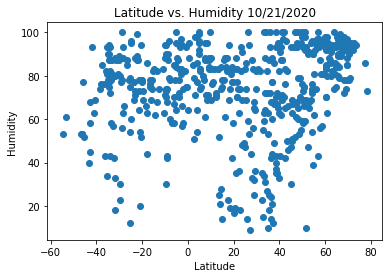

<Figure size 432x288 with 0 Axes>

In [17]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Humidity']
plt.title(f"Latitude vs. Humidity {Date}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("../output_datafig102.png")

## Latitude vs. Cloudiness Plot

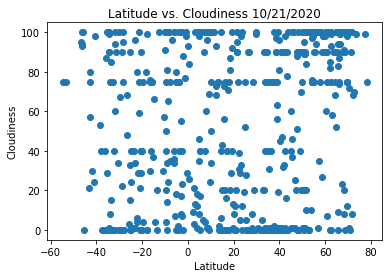

<Figure size 432x288 with 0 Axes>

In [18]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Cloudiness']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Cloudiness {Date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_datafig103.png")

## Latitude vs. Wind Speed Plot

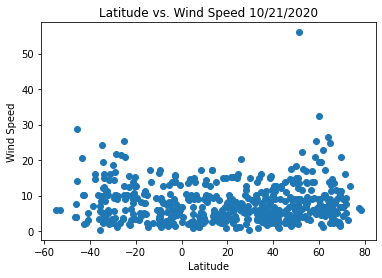

<Figure size 432x288 with 0 Axes>

In [19]:
x_values=clean_dataframe ['lat']
y_values=clean_dataframe['Wind Speed']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Wind Speed {Date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_datafig104.png")

## Linear Regression

In [20]:
#What are we doing for linear regression? Check x and y values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(regress_values)

0      7.952014
1      7.924688
2      7.950431
3      7.980298
4      7.981029
         ...   
529    7.959140
530    7.965447
531    7.928804
532    7.976119
533    7.952014
Name: lat, Length: 534, dtype: float64


In [21]:
clean_dataframe['hemisphere']=np.where(clean_dataframe['lat']>0, 'north', 'South')
clean_dataframe


,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Bathsheba,13.22,-59.52,82.40,83,75,17.22,BB,10/21/2020,north
1,Hobart,-42.88,147.33,60.01,58,75,10.29,AU,10/21/2020,South
2,Ranong,9.97,98.63,82.40,88,75,3.78,TH,10/21/2020,north
3,Barrow,71.29,-156.79,33.80,95,90,16.11,US,10/21/2020,north
4,Upernavik,72.79,-56.15,23.16,95,70,3.09,GL,10/21/2020,north
...,...,...,...,...,...,...,...,...,...,...
529,Naica,27.85,-105.48,74.34,33,8,10.11,MX,10/21/2020,north
530,Eureka,40.80,-124.16,55.40,62,1,9.17,US,10/21/2020,north
531,Tigre,-34.43,-58.58,59.00,87,90,19.46,AR,10/21/2020,South
532,Troitsko-Pechorsk,62.71,56.20,23.97,94,99,10.09,RU,10/21/2020,north


In [22]:
north_dataframe=weather_data_df.copy()
north_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="north")]
north_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
1,Hobart,-42.88,147.33,60.01,58,75,10.29,AU,10/21/2020,South
6,Kavieng,-2.57,150.80,84.85,66,23,7.63,PG,10/21/2020,South
8,Itaqui,-29.13,-56.55,68.79,77,0,16.62,BR,10/21/2020,South
9,Taltal,-25.40,-70.48,57.15,75,15,3.29,CL,10/21/2020,South
12,Hermanus,-34.42,19.23,57.00,90,1,3.00,ZA,10/21/2020,South
...,...,...,...,...,...,...,...,...,...,...
516,Paita,-5.09,-81.11,64.45,84,0,10.45,PE,10/21/2020,South
518,Monte Alegre,-2.01,-54.07,81.97,58,0,4.54,BR,10/21/2020,South
521,Mauá,-23.67,-46.46,66.20,77,40,10.29,BR,10/21/2020,South
524,Mossamedes,-15.20,12.15,69.64,82,37,2.28,AO,10/21/2020,South


In [23]:
south_dataframe=weather_data_df.copy()
south_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="South")]
south_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Bathsheba,13.22,-59.52,82.40,83,75,17.22,BB,10/21/2020,north
2,Ranong,9.97,98.63,82.40,88,75,3.78,TH,10/21/2020,north
3,Barrow,71.29,-156.79,33.80,95,90,16.11,US,10/21/2020,north
4,Upernavik,72.79,-56.15,23.16,95,70,3.09,GL,10/21/2020,north
5,Taoudenni,22.68,-3.98,78.19,18,29,5.59,ML,10/21/2020,north
...,...,...,...,...,...,...,...,...,...,...
528,Devils Lake,48.11,-98.87,28.40,79,90,3.96,US,10/21/2020,north
529,Naica,27.85,-105.48,74.34,33,8,10.11,MX,10/21/2020,north
530,Eureka,40.80,-124.16,55.40,62,1,9.17,US,10/21/2020,north
532,Troitsko-Pechorsk,62.71,56.20,23.97,94,99,10.09,RU,10/21/2020,north


In [24]:
def linearreg(x_val, y_val, x_label, y_label, posn, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,posn,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()

The r-squared is: 0.39845449800847227


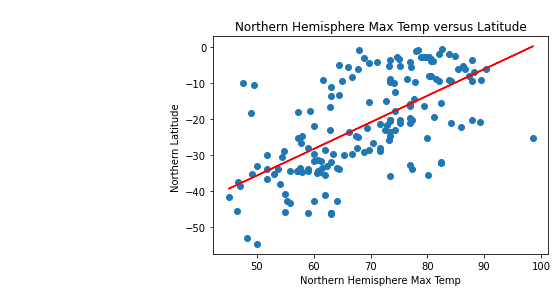

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [37]:
x_val= north_dataframe['Max Temp']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Max Temp')
y_label=('Northern Latitude ')
posn=(6,8)
Title= "Northern Hemisphere Max Temp versus Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig105.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8157280471903275


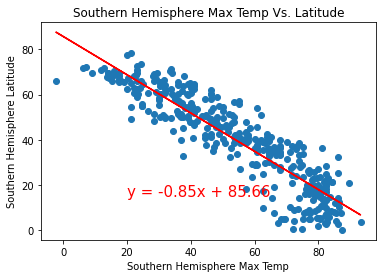

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [36]:
x_val= south_dataframe['Max Temp']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Max Temp')
y_label=('Southern Hemisphere Latitude' )
posn=(20,15)
Title="Southern Hemisphere Max Temp Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig106.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04780709720262393


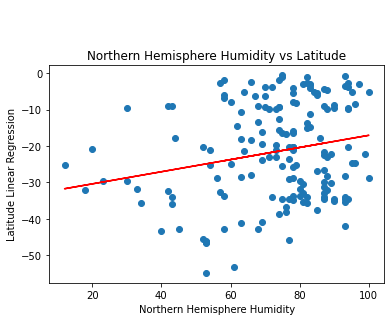

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [35]:
x_val= north_dataframe['Humidity']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Humidity')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Humidity vs Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig107.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06000043195295546


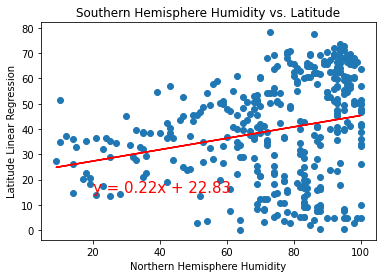

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [29]:
x_val= south_dataframe['Humidity']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Humididty')
plt.ylabel('Southern Latitude Latitude Linear Regression')
posn=(20,15)
Title='Southern Hemisphere Humidity vs. Latitude'
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig108.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.264877615560157e-06


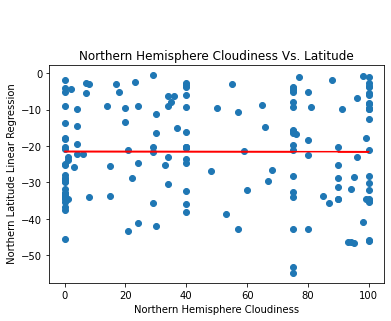

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [30]:
x_val= north_dataframe['Cloudiness']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Cloudiness')
y_label=(' Northern Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig109.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08303038321905472


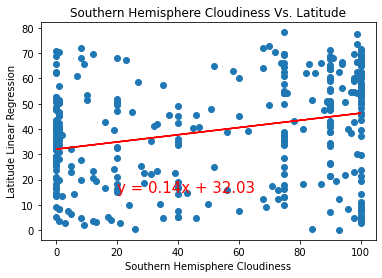

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [31]:
x_val=south_dataframe['Cloudiness']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Cloudiness')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Southern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig110.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08303038321905472


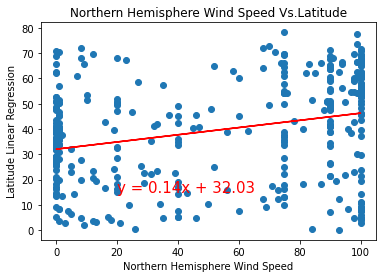

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [32]:
x_values= north_dataframe['Wind Speed']
y_values=north_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Northern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Wind Speed Vs.Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig111.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02311157371456162


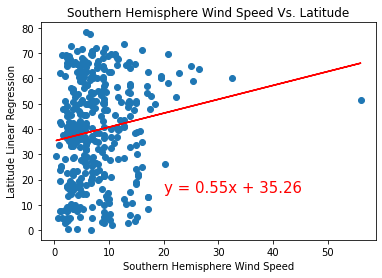

The r-value is: 8.642685476445201e-06


<Figure size 432x288 with 0 Axes>

In [34]:
x_val=south_dataframe['Wind Speed']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Southern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Southern Hemisphere Wind Speed Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig112.png")
